<a href="https://colab.research.google.com/github/zdwhite/Thinkful-Unit-5/blob/master/Challenge_What_test_to_use.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Challenge: What test to use

Using selected questions from the 2012 and 2014 editions of the [European Social Survey](http://www.europeansocialsurvey.org/data/round-index.html), address the following questions. Keep track of your code and results in a Jupyter notebook or other source that you can share with your mentor. For each question, explain why you chose the approach you did.

Here is the [data file](https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/ESS_practice_data/ESSdata_Thinkful.csv). And here is the [codebook](https://thinkful-ed.github.io/data-201-resources/ESS_practice_data/ESS_codebook.html), with information about the variable coding and content.

In this dataset, the same participants answered questions in 2012 and again 2014.





In [0]:
import pandas as pd
import numpy as np
from scipy import stats 

import matplotlib.pyplot as plt
import seaborn as sns


## importing data

df = pd.read_csv('https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/ESS_practice_data/ESSdata_Thinkful.csv')

# change some encoding for graphics later
df['year']=np.where(df['year']==6,2012,2014)
df['gndr']=np.where(df['gndr']==1,'Male','Female')

df['partner']  = np.where(df['partner']==1,'Lives with Partner','Does not')

df.dropna(inplace=True)

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/ESS_practice_data/ESSdata_Thinkful.csv')
#df.dropna(inplace=True)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8594 entries, 0 to 8593
Data columns (total 13 columns):
cntry      8594 non-null object
idno       8594 non-null float64
year       8594 non-null int64
tvtot      8586 non-null float64
ppltrst    8580 non-null float64
pplfair    8555 non-null float64
pplhlp     8569 non-null float64
happy      8563 non-null float64
sclmeet    8579 non-null float64
sclact     8500 non-null float64
gndr       8584 non-null float64
agea       8355 non-null float64
partner    8577 non-null float64
dtypes: float64(11), int64(1), object(1)
memory usage: 872.9+ KB


In [3]:
df.isnull().sum()

cntry      0
idno       0
year       0
tvtot      0
ppltrst    0
pplfair    0
pplhlp     0
happy      0
sclmeet    0
sclact     0
gndr       0
agea       0
partner    0
dtype: int64

## Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.

**ppltrst**: Most people can be trusted or you can't be too careful

Survey Question:

All rounds: Using this card, generally speaking, would you say that most people can be trusted, or that you can't be too careful in dealing with people? Please tell me on a score of 0 to 10, where 0 means you can't be too careful and 10 means that most people can be trusted.

In [0]:
dd = pd.melt(df,id_vars=['cntry','year'],value_vars=['ppltrst'],value_name='Trust index')


In [59]:
df_year_cntry = df.groupby(['cntry','year'])['ppltrst'].describe().reset_index()

df_year_cntry

,cntry,year,count,mean,std,min,25%,50%,75%,max
0,CH,6,732.0,5.685792,2.102611,0.0,4.00,6.0,7.00,10.0
1,CH,7,743.0,5.764468,2.119026,0.0,5.00,6.0,7.00,10.0
2,CZ,6,601.0,4.402662,2.402969,0.0,3.00,4.0,6.00,10.0
3,CZ,7,606.0,4.356436,2.309524,0.0,3.00,5.0,6.00,10.0
4,DE,6,13.0,5.076923,1.497862,3.0,4.00,5.0,5.00,8.0
5,DE,7,14.0,5.357143,2.530039,2.0,3.25,5.5,7.00,10.0
6,ES,6,1158.0,5.127807,2.161797,0.0,4.00,5.0,7.00,10.0
7,ES,7,1134.0,4.940035,2.117869,0.0,3.00,5.0,6.75,10.0
8,NO,6,708.0,6.648305,1.755745,0.0,5.00,7.0,8.00,10.0
9,NO,7,712.0,6.599719,1.819924,0.0,5.00,7.0,8.00,10.0


## Check for Outliers

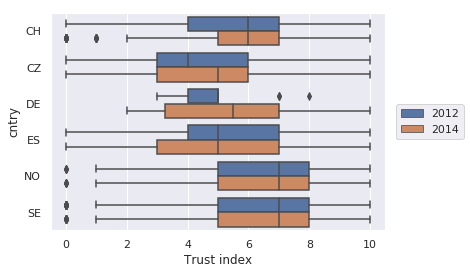

In [7]:
sns.set()
g = sns.boxplot(y='cntry',x='Trust index',data=dd,orient ='h',hue='year')

g.legend(loc='center right', bbox_to_anchor=(1.25, 0.5), ncol=1)

Looking by country we can observe that outliers exist in six of the twelve sets.

## Check for Normality

In [0]:
def shapiro(df):
  cntry_list = df['cntry'].unique()
  results = []
  for x in cntry_list:
    pop_1 = df.loc[(df['cntry']==x) & (df['year']==2012),['ppltrst']]
    pop_2 = df.loc[(df['cntry']==x) & (df['year']==2014),['ppltrst']]
    normal_1 = stats.shapiro(pop_1)
    normal_2 = stats.shapiro(pop_2)
    results.extend([normal_1,normal_2,x])
  return results

In [41]:
shapiro(df)

[(0.9517108201980591, 9.511383786695374e-15),
 (0.9547930955886841, 2.4654701498145852e-14),
 'CH',
 (0.9679821133613586, 3.389247771323767e-10),
 (0.9714686870574951, 1.2018976924821345e-09),
 'CZ',
 (0.8929166197776794, 0.10693283379077911),
 (0.9425466060638428, 0.4519253373146057),
 'DE',
 (0.9493078589439392, 1.4677391976503768e-19),
 (0.9661633968353271, 1.2871629133506595e-15),
 'ES',
 (0.9208088517189026, 7.932947968682749e-19),
 (0.9293321967124939, 7.98394313645876e-18),
 'NO',
 (0.9367397427558899, 1.2586250953636158e-18),
 (0.9376322627067566, 1.3852298444033788e-18),
 'SE']

Intrrupting the results above suggest that checking for normality on data that is essentially categorical is a bad idea as groups with low samples size such as Germany appear to be more normal looking than other countries with higher sample sizes such as Spain, this effect is shown in the QQ plots below. 

This rules our using any type of paired T-Tests as they rely on normality and the same sample size for each group which we don't have.



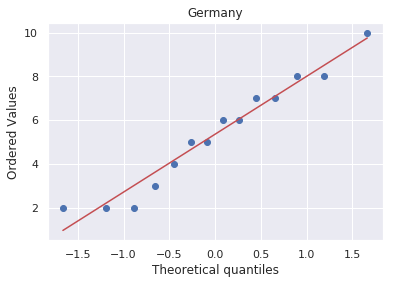

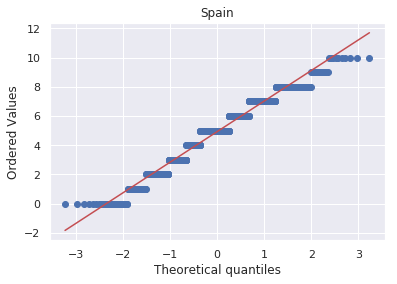

In [54]:
DE = df.loc[(df['cntry']=='DE') & (df['year']==2014),['ppltrst']]['ppltrst']
ES = df.loc[(df['cntry']=='ES') & (df['year']==2014),['ppltrst']]['ppltrst']
stats.probplot(DE, plot= plt)
plt.title('Germany')

plt.show() 
stats.probplot(ES, plot= plt)
plt.title('Spain')

plt.show() 

In [0]:
# Country wise pair t-test



def t_test(df):
  cntry_list = df['cntry'].unique()
  results = []
  for x in cntry_list:
    pop_1 = df.loc[(df['cntry']==x) & (df['year']==2012),['ppltrst']]
    pop_2 = df.loc[(df['cntry']==x) & (df['year']==2014),['ppltrst']]
    paired_t_test = stats.ttest_rel(pop_1,pop_2)
    results.append(paired_t_test,x)
  return results
  

In [34]:
#make list of countries seperate data from df first by country then slice by year and run t test

#blah= t_test(df)
#blah

pop_1 = df.loc[(df['cntry']=='CH') & (df['year']==2012),['ppltrst']]
pop_2 = df.loc[(df['cntry']=='CH') & (df['year']==2014),['ppltrst']]
#stats.ttest_rel(pop_1,pop_2)

pop_1.describe(),pop_2.describe()

(          ppltrst
 count  732.000000
 mean     5.685792
 std      2.102611
 min      0.000000
 25%      4.000000
 50%      6.000000
 75%      7.000000
 max     10.000000,           ppltrst
 count  743.000000
 mean     5.764468
 std      2.119026
 min      0.000000
 25%      5.000000
 50%      6.000000
 75%      7.000000
 max     10.000000)






## Did people become happier from 2012 to 2014? Compute results for each country in the sample.



In [0]:

dd_happy = pd.melt(df,id_vars=['cntry','year'],value_vars=['happy'],value_name='happy')

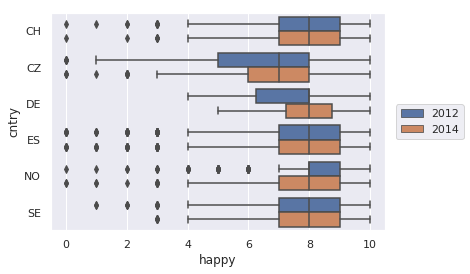

In [0]:
sns.set()
g = sns.boxplot(y='cntry',x='happy',data=dd_happy,orient ='h',hue='year')

g.legend(loc='center right', bbox_to_anchor=(1.25, 0.5), ncol=1)






## Who reported watching more TV in 2012, men or women?




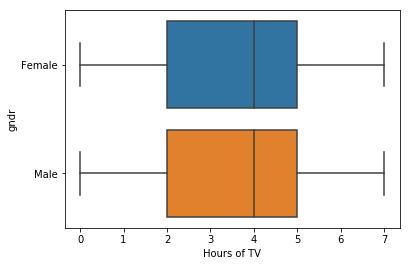

In [0]:
dd_tv = pd.melt(df,id_vars=['gndr'],value_vars=['tvtot'],value_name='Hours of TV')

sns.boxplot(y='gndr',x='Hours of TV',data=dd_tv,orient ='h')


In [0]:
pd.DataFrame(dd_tv[dd_tv['gndr']=='Female']['Hours of TV']).describe(),pd.DataFrame(dd_tv[dd_tv['gndr']=='Male']['Hours of TV']).describe()

(       Hours of TV
 count  4064.000000
 mean      3.863435
 std       2.026116
 min       0.000000
 25%       2.000000
 50%       4.000000
 75%       5.000000
 max       7.000000,        Hours of TV
 count  4109.000000
 mean      3.781455
 std       1.996208
 min       0.000000
 25%       2.000000
 50%       4.000000
 75%       5.000000
 max       7.000000)






## Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?



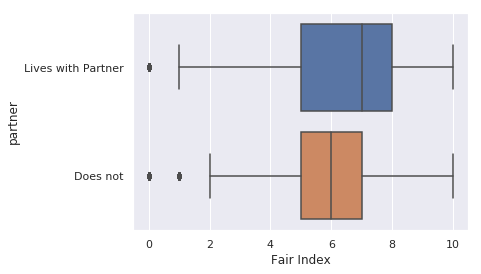

In [0]:
dd_partner_fair = pd.melt(df[df['year']==2012],id_vars=['partner'],value_vars=['pplfair'],value_name='Fair Index')

sns.boxplot(y='partner',x='Fair Index',data=dd_partner_fair,orient ='h')






## Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?


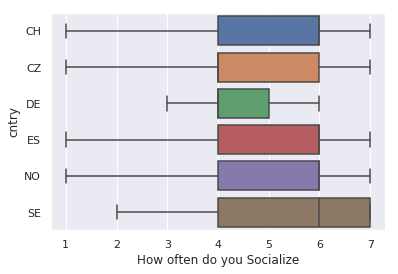

In [0]:
dd_sclmeet =  pd.melt(df[df['year']==2014],id_vars=['cntry'],value_vars=['sclmeet'],value_name='How often do you Socialize')

sns.boxplot(y='cntry',x='How often do you Socialize',data=dd_sclmeet,orient ='h')

## Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?


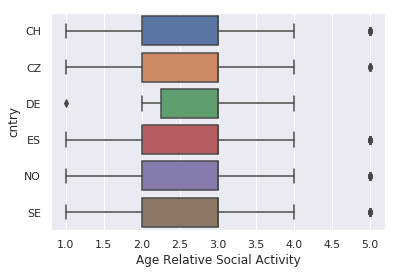

In [0]:
dd_sclact = pd.melt(df[df['year']==2014],id_vars=['cntry'],value_vars=['sclact'],value_name='Age Relative Social Activity')

sns.boxplot(y='cntry',x='Age Relative Social Activity',data=dd_sclact,orient ='h')

In [0]:
df[df['year']==2014].groupby(['year','cntry'])['sclact'].describe()

count      mean       std  min   25%  50%  75%  max
year cntry                                                      
2014 CH      743.0  2.784657  0.906360  1.0  2.00  3.0  3.0  5.0
     CZ      622.0  2.729904  0.838509  1.0  2.00  3.0  3.0  5.0
     DE       14.0  2.714286  0.726273  1.0  2.25  3.0  3.0  4.0
     ES     1137.0  2.631486  0.949700  1.0  2.00  3.0  3.0  5.0
     NO      713.0  2.858345  0.823371  1.0  2.00  3.0  3.0  5.0
     SE      867.0  2.878893  0.859859  1.0  2.00  3.0  3.0  5.0